In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
file = "data-130325.csv"
df = pd.read_csv(file)

df_info = df.info
df_head = df.head

types = df.dtypes
names = df.columns.tolist()

null = df.isnull().sum()
duplicate = df.duplicated().sum()

In [ ]:
df_info, df_head
df.head(5)

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,70.36,Synthetic,75,65,4.9,3,ZARA,20,1/28/2018,211,1,2018
1,1002,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,91.59,Wool,296,25,3.5,6,ZARA,0,1/28/2018,211,1,2018
2,1003,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,129.52,Wool,50,32,4.3,4,ZARA,5,1/7/2018,64,1,2018
3,1004,Summer Dress,Male,Shorts,Plain,White,25-35,All,116.01,Cotton,435,73,4.6,3,ZARA,10,1/1/2018,171,1,2018
4,1005,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,125.48,Viscose,79,36,3.6,4,ZARA,0,1/28/2018,126,1,2018


In [ ]:
types, names

(product_id             int64
 product_name          object
 gender                object
 category              object
 pattern               object
 color                 object
 age_group             object
 season                object
 price                 object
 material              object
 sales_count            int64
 reviews_count          int64
 average_rating        object
 out_of_stock_times     int64
 brand                 object
 discount              object
 last_stock_date       object
 wish_list_count        int64
 month_of_sale          int64
 year_of_sale           int64
 dtype: object,
 ['product_id',
  'product_name',
  'gender',
  'category',
  'pattern',
  'color',
  'age_group',
  'season',
  'price',
  'material',
  'sales_count',
  'reviews_count',
  'average_rating',
  'out_of_stock_times',
  'brand',
  'discount',
  'last_stock_date',
  'wish_list_count',
  'month_of_sale',
  'year_of_sale'])

In [ ]:
null, duplicate

(product_id            0
 product_name          0
 gender                0
 category              0
 pattern               0
 color                 0
 age_group             0
 season                0
 price                 0
 material              0
 sales_count           0
 reviews_count         0
 average_rating        0
 out_of_stock_times    0
 brand                 0
 discount              0
 last_stock_date       0
 wish_list_count       0
 month_of_sale         0
 year_of_sale          0
 dtype: int64,
 np.int64(0))

Không có giá trị null, không có giá trị lặp

In [ ]:
df["price"] = df["price"].str.replace(",", ".").astype(float)
df["average_rating"] = df["average_rating"].str.replace(",", ".").astype(float)
df["discount"] = df["discount"].str.replace("%", "").astype(int)

types = df.dtypes
types

product_id              int64
product_name           object
gender                 object
category               object
pattern                object
color                  object
age_group              object
season                 object
price                 float64
material               object
sales_count             int64
reviews_count           int64
average_rating        float64
out_of_stock_times      int64
brand                  object
discount                int64
last_stock_date        object
wish_list_count         int64
month_of_sale           int64
year_of_sale            int64
dtype: object

Chuyển dữ liệu date time

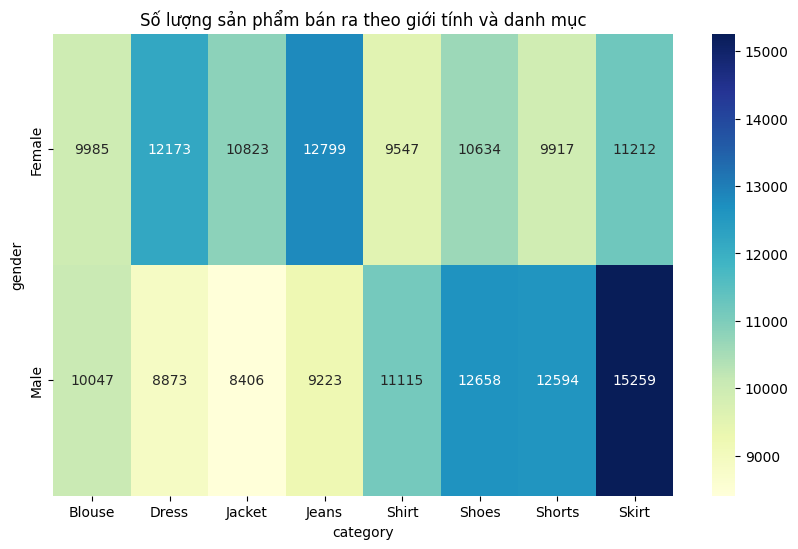

In [ ]:
gender_count = df.groupby(["gender", "category"])["sales_count"].sum().unstack()

plt.figure(figsize=(10, 6))
sb.heatmap(gender_count, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Số lượng sản phẩm bán ra theo giới tính và danh mục")
plt.show()

/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_82783/3748699071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=material_discount.values, y=material_discount.index, palette='Reds_r')


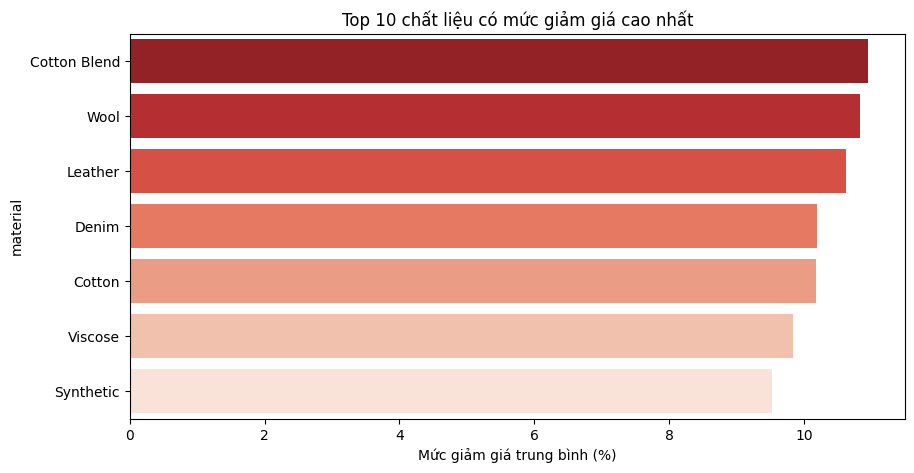

In [ ]:
material_discount = df.groupby("material")["discount"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sb.barplot(x=material_discount.values, y=material_discount.index, palette='Reds_r')
plt.title("Top 10 chất liệu có mức giảm giá cao nhất")
plt.xlabel("Mức giảm giá trung bình (%)")
plt.ylabel("material")
plt.show()

/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_82783/4222788263.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='sales_count', y='category', data=spring, palette='spring')
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_82783/4222788263.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='sales_count', y='category', data=summer, palette='summer')
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_82783/4222788263.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='sales_count', y='category', data=win

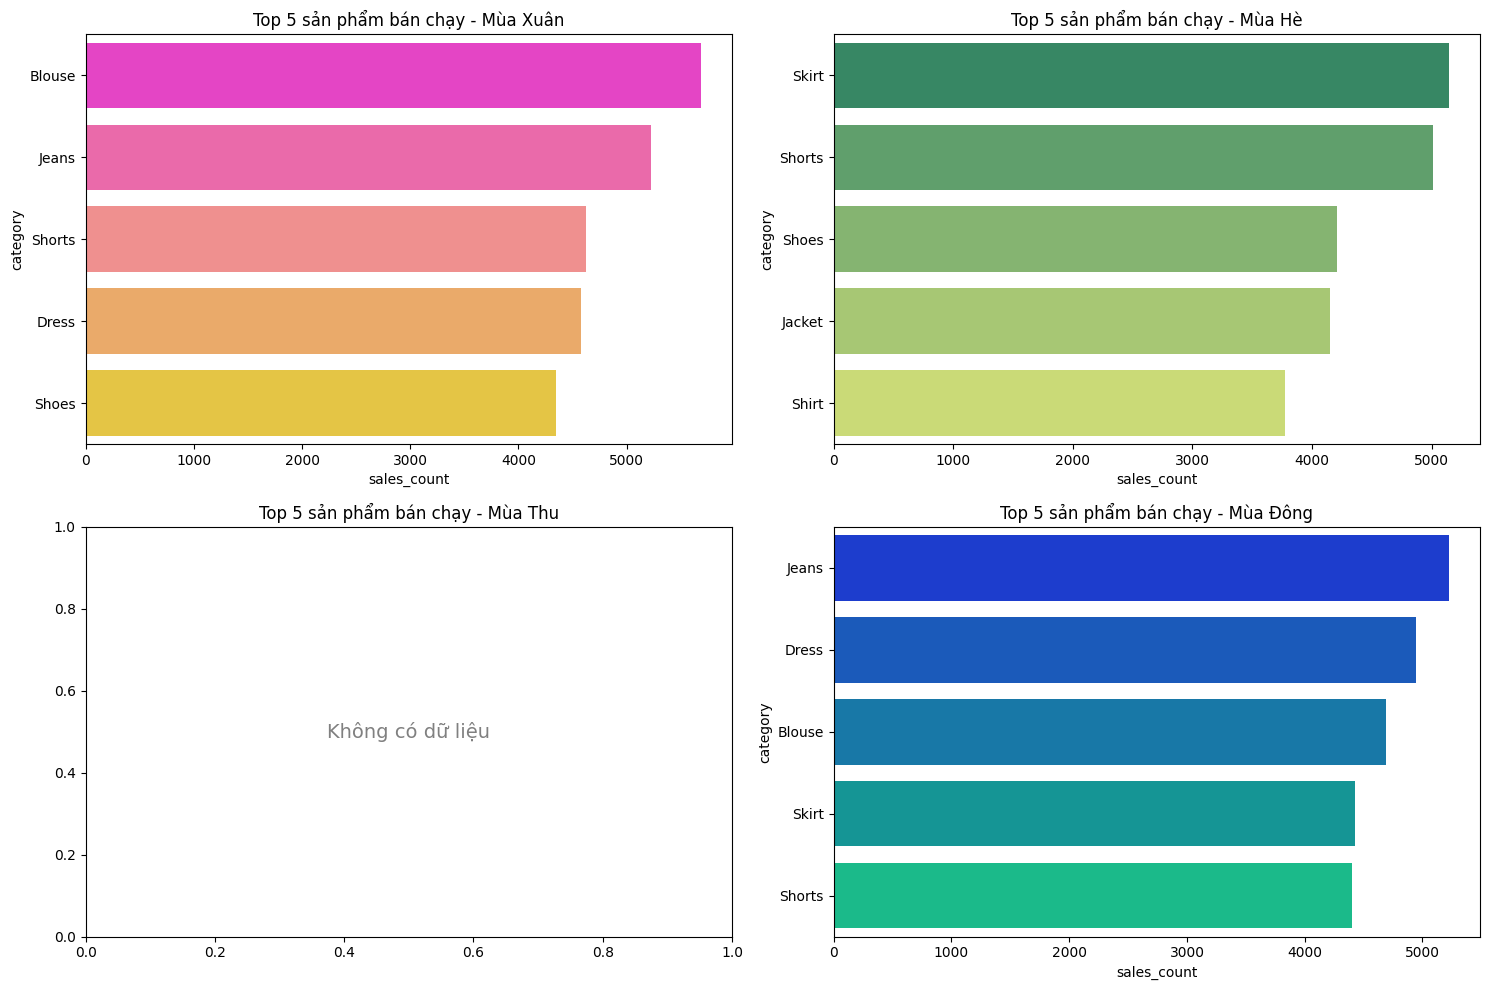

In [ ]:
plt.figure(figsize=(15, 10))

top_5_by_season = df.groupby(['season', 'category'])['sales_count'].sum().groupby(level=0, group_keys=False).nlargest(5)
top_5_by_season = top_5_by_season.reset_index()

spring = top_5_by_season[top_5_by_season['season'] == 'Spring']
summer = top_5_by_season[top_5_by_season['season'] == 'Summer']
fall = top_5_by_season[top_5_by_season['season'] == 'Fall']
winter = top_5_by_season[top_5_by_season['season'] == 'Winter']

# Mùa xuân
plt.subplot(2, 2, 1)
sb.barplot(x='sales_count', y='category', data=spring, palette='spring')
plt.title('Top 5 sản phẩm bán chạy - Mùa Xuân')

# Mùa hè
plt.subplot(2, 2, 2)
sb.barplot(x='sales_count', y='category', data=summer, palette='summer')
plt.title('Top 5 sản phẩm bán chạy - Mùa Hè')

# Mùa thu
plt.subplot(2, 2, 3)
plt.text(0.5, 0.5, 'Không có dữ liệu', ha='center', va='center', fontsize=14, color='gray')
plt.title('Top 5 sản phẩm bán chạy - Mùa Thu')

# Mùa đông
plt.subplot(2, 2, 4)
sb.barplot(x='sales_count', y='category', data=winter, palette='winter')
plt.title('Top 5 sản phẩm bán chạy - Mùa Đông')

plt.tight_layout()
plt.show()

Phân tích dữ liệu nhóm tuổi nào mua nhiều nhất, dữ liệu liên quan tới màu; ratings; category và review; sản phẩm tho số lần out of stock.



In [ ]:
age_tendency = df.groupby("age_group")
age_tendency

/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_82783/1100689347.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=sales.values, y=sales.index, palette='winter')
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_82783/1100689347.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=sales.values, y=sales.index, palette='winter')
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_82783/1100689347.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=sales.values, y=sales.index, palette='winter')


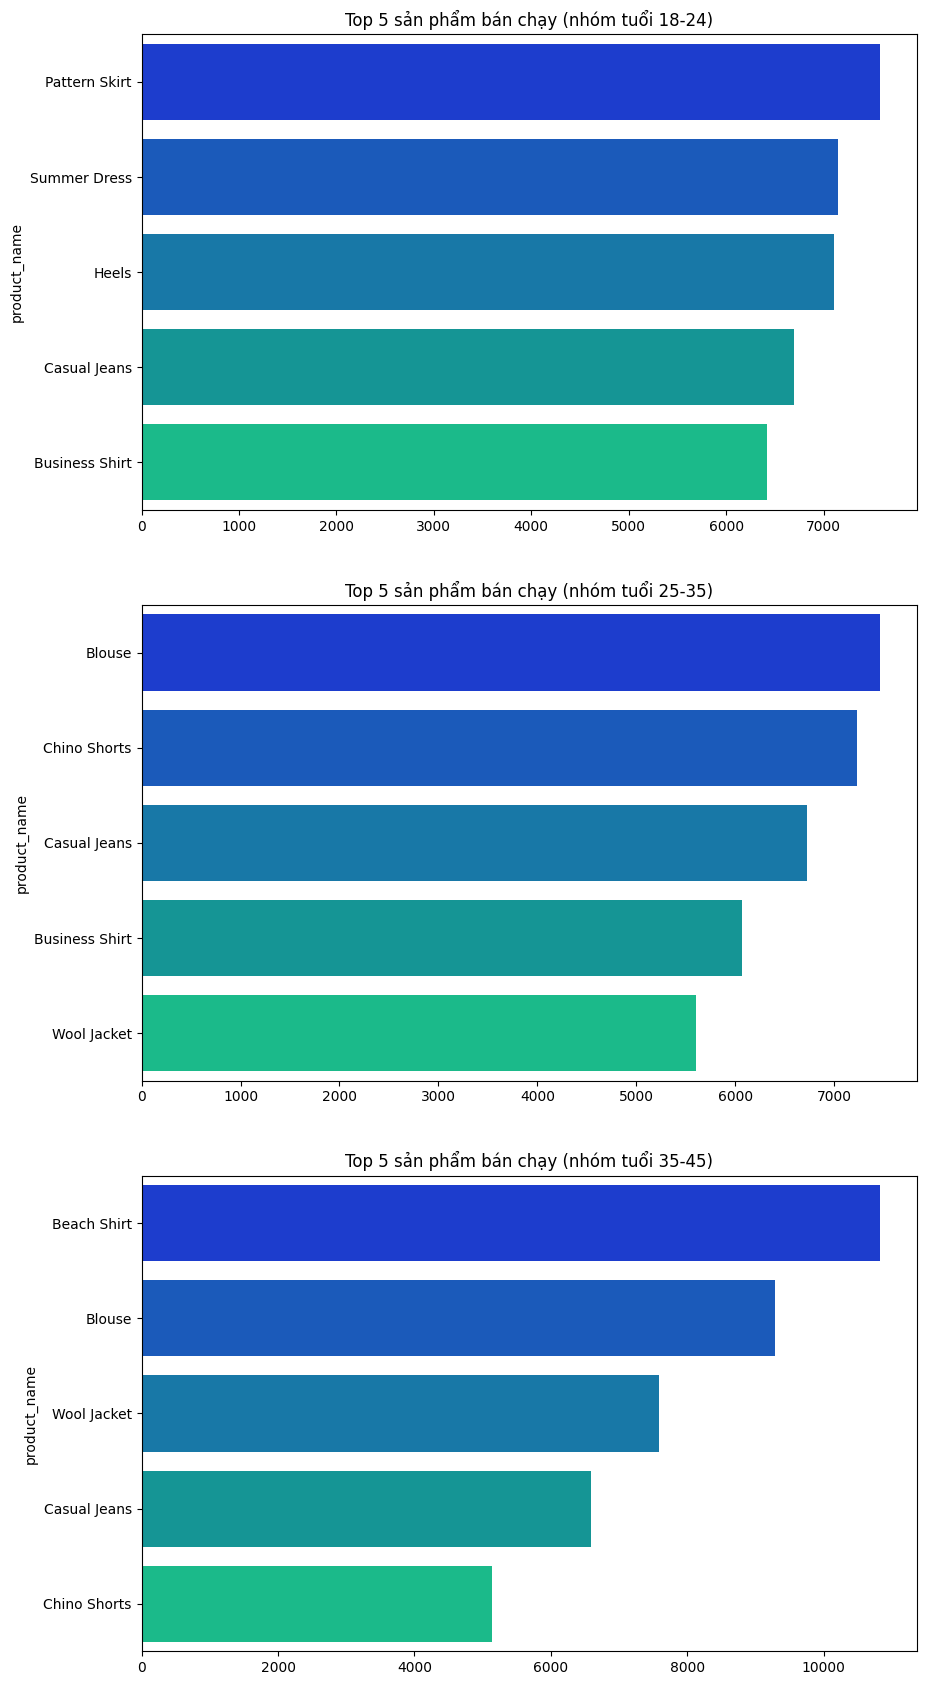

In [ ]:
plt.figure(figsize=(10, 21))
stt = 1

for name, group in age_tendency:
    sales = group.groupby("product_name")["sales_count"].sum().sort_values(ascending=False).head(5)
    plt.subplot(3, 1, stt)
    sb.barplot(x=sales.values, y=sales.index, palette='winter')
    plt.title(f'Top 5 sản phẩm bán chạy (nhóm tuổi {name})')
    stt += 1


/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_82783/3796401236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=color_ratings.values, y=color_ratings.index, palette='Reds_r')


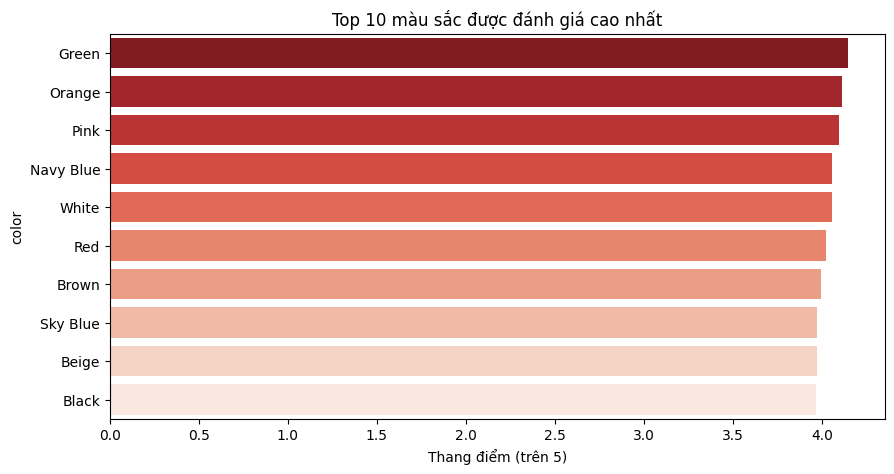

In [ ]:
color_ratings = df.groupby("color")["average_rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sb.barplot(x=color_ratings.values, y=color_ratings.index, palette='Reds_r')
plt.title("Top 10 màu sắc được đánh giá cao nhất")
plt.xlabel("Thang điểm (trên 5)")
plt.ylabel("color")
plt.show()